### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [ ]:
import pandas as pd

df = pd.read_csv('./uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,08-01-2014 00:03,40.7366,-73.9906,B02512
1,08-01-2014 00:09,40.7260,-73.9918,B02512
2,08-01-2014 00:12,40.7209,-74.0507,B02512
3,08-01-2014 00:12,40.7387,-73.9856,B02512
4,08-01-2014 00:12,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [ ]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] =  pd.to_datetime(df['Date/Time'])


In [ ]:
pickups_by_date =  df.groupby(df['Date/Time'].dt.date).size()
pickups_by_date

Date/Time
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
dtype: int64

In [ ]:
# Find the date with the highest number of pickups
result =  pickups_by_date.idxmax()

print("Date with most number of pickups: ", result)


Date with most number of pickups:  2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [ ]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
value= pickups_by_date.max()
print("Number of pickups made on the date with the highest number of pickups:" ,value)

Number of pickups made on the date with the highest number of pickups: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [ ]:
# Count the number of unique TLC base companies

unique_TLC_base_companies= df["Base"].nunique()
print("Number of Unique TLC companies: ",unique_TLC_base_companies)


Number of Unique TLC companies:  5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [ ]:
# Group by TLC base company and count the number of pickups
pickups_by_Base =  df.groupby(df['Base']).size()

# Find the TLC base company with the highest number of pickups
print(f"TLC Base company with highest pickups is {pickups_by_Base.idxmax()} with pickups {pickups_by_Base.max()}")

TLC Base company with highest pickups is B02617 with pickups 355803


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [ ]:
# Group by TLC base company and count the number of pickups

pickups_by_Base =  df.groupby(df['Base']).size()

print(pickups_by_Base)



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [ ]:
# Extract the hour from the 'Date/Time' column
df.head()

# Group by hour and count the number of pickups
pickups_by_Time =  df.groupby(df["Date/Time"].dt.hour).size()

print("hour with the highest number of pickups:", pickups_by_Time.idxmax())


hour with the highest number of pickups: 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0.5, 1.0, 'Number of Uber pickups over time')

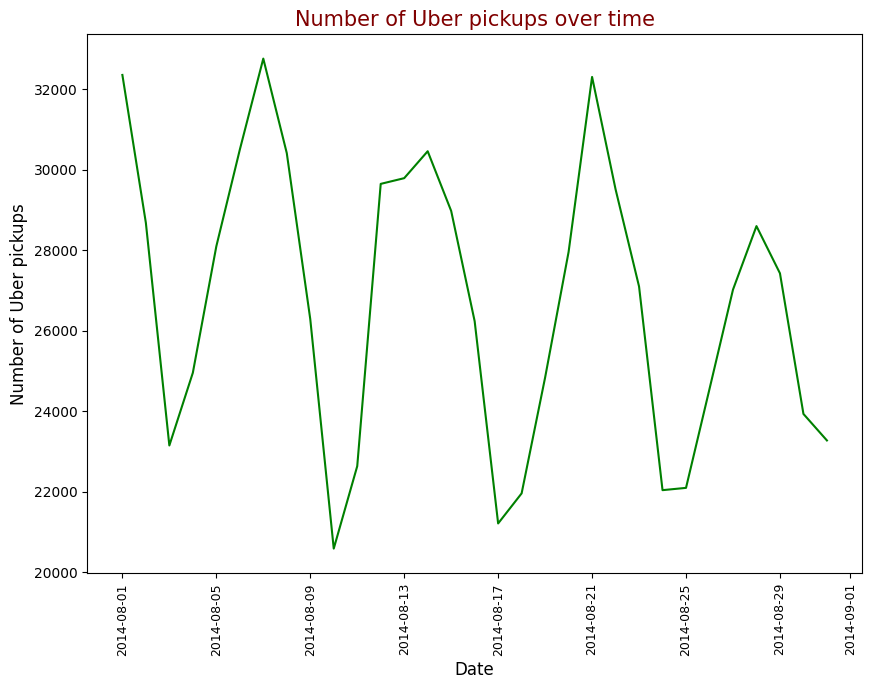

In [ ]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickups_by_date =  df.groupby(df['Date/Time'].dt.date).size()
pickups_by_date

# Create a line plot to visualize the number of pickups over time
pickups_by_date.plot(kind =  'line', figsize = (10,7),color="green")
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Uber pickups',fontsize=12)
plt.xticks(rotation=90,fontsize=9)
plt.title('Number of Uber pickups over time',color="maroon",fontsize=15)

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0.5, 1.0, 'Distribution of uber pickups by Latitude')

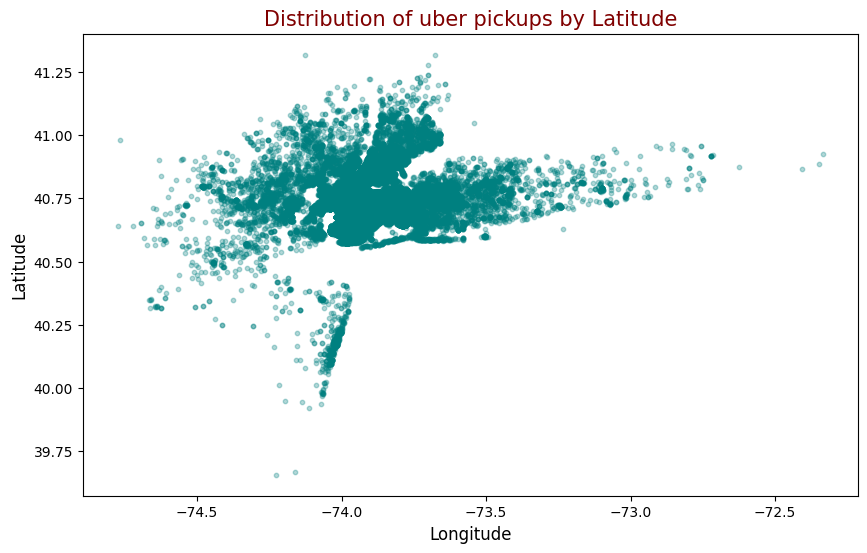

In [ ]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize = (10,6))
plt.scatter(df['Lon'], df['Lat'], s = 10, alpha = 0.3, color= 'teal')
plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.title('Distribution of uber pickups by Latitude',fontsize=15,color="maroon")

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0.5, 1.0, 'Number of Uber pickups by TLC Base Company')

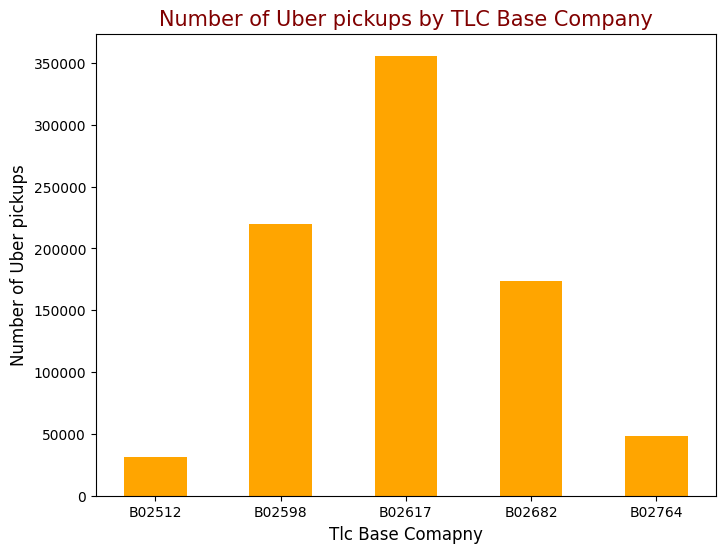

In [ ]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickups_by_base =  df.groupby('Base').size()
plt.figure(figsize = (8,6))
plt.bar(pickups_by_base.index, pickups_by_base.values, width=0.5, color=  'orange')
plt.xlabel('Tlc Base Comapny',fontsize=12)
plt.ylabel('Number of Uber pickups',fontsize=12)
plt.title('Number of Uber pickups by TLC Base Company',color="maroon",fontsize=15)

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage Distibutions of Uber Pickups by day of the Week')

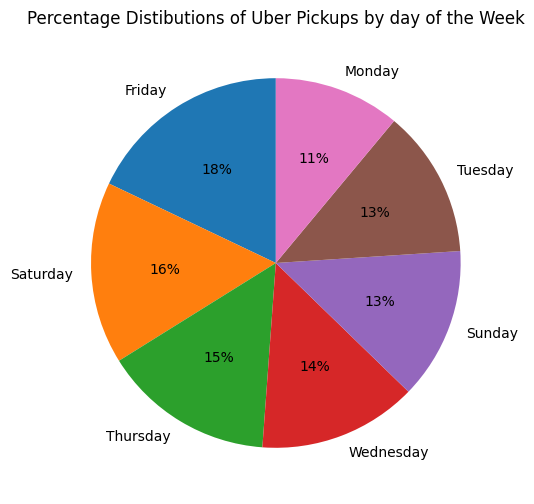

In [ ]:
# Group by day of the week and count the number of pickups
dickups_by_day =  df['Date/Time'].dt.day_name().value_counts()

plt.figure(figsize = (8,6))

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(x =  dickups_by_day.values, labels =  dickups_by_day.index, autopct = '%1.f%%', startangle = 90)
plt.title('Percentage Distibutions of Uber Pickups by day of the Week')

